In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Các thư viện Scikit-learn (sklearn)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')

# --- Tải Dữ liệu ---
file_path = 'wholesale_customers_data.csv'
df = pd.read_csv(file_path)

# Bỏ cột 'Unnamed: 0' nếu có
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print("Tải dữ liệu thành công!")
print(df.head())

Tải dữ liệu thành công!
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


--- Câu (a): Biểu đồ Thống kê Số lượng lớp 'Region' ---
Thống kê số lượng mỗi lớp 'Region':
Region
1     77
2     47
3    316
Name: count, dtype: int64


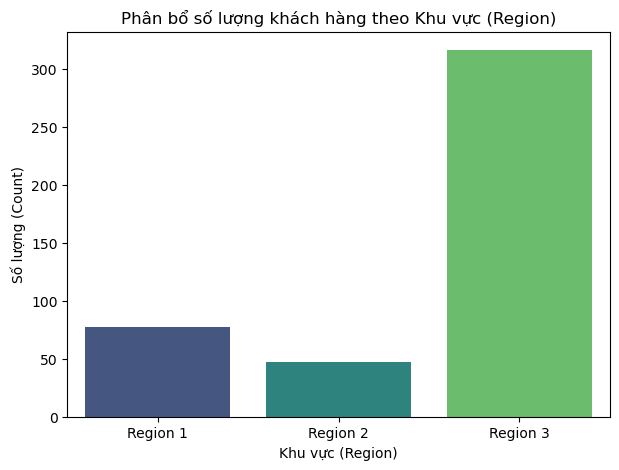

In [3]:
print("--- Câu (a): Biểu đồ Thống kê Số lượng lớp 'Region' ---")

# 1. Thống kê số lượng
region_counts = df['Region'].value_counts().sort_index()
print("Thống kê số lượng mỗi lớp 'Region':")
print(region_counts)

# 2. Vẽ biểu đồ
plt.figure(figsize=(7, 5))
# Dùng countplot của seaborn (dựa trên matplotlib) để vẽ
sns.countplot(x='Region', data=df, palette='viridis')

plt.title('Phân bổ số lượng khách hàng theo Khu vực (Region)')
plt.xlabel('Khu vực (Region)')
plt.ylabel('Số lượng (Count)')
plt.xticks(ticks=[0, 1, 2], labels=['Region 1', 'Region 2', 'Region 3'])
plt.show()

In [5]:
print("--- Câu (b): Chuẩn bị, Chia và Huấn luyện KNN (K=5) ---")

# 1. Tách X (đặc trưng) và y (mục tiêu)
X = df.drop('Region', axis=1)
y = df['Region'] # y là 'Region'

# 2. Chia dữ liệu (80% train, 20% test)
# QUAN TRỌNG: Dùng 'stratify=y' vì dữ liệu 'Region' mất cân bằng
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)
print("Đã chia dữ liệu 80/20 (có 'stratify').")

# 3. Tiền xử lý (Preprocessing)
# 'Channel' là đặc trưng dạng danh mục (1, 2)
# 6 cột còn lại là số (cần Scale)
categorical_features = ['Channel']
numeric_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Tạo 'transformer' để chuẩn hóa (Scale) cột số và One-Hot cột 'Channel'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), # Chuẩn hóa 6 cột số
        ('cat', OneHotEncoder(), categorical_features) # Mã hóa One-Hot cột 'Channel'
    ])

# 4. Tạo Pipeline để kết hợp Tiền xử lý và Mô hình
# Pipeline sẽ tự động: 1. Scale/OneHot -> 2. Huấn luyện KNN
model_knn_5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) # Yêu cầu K=5
])

# 5. Huấn luyện mô hình
model_knn_5.fit(X_train, y_train)

print("Đã huấn luyện xong mô hình KNN (K=5) bao gồm cả bước tiền xử lý.")

--- Câu (b): Chuẩn bị, Chia và Huấn luyện KNN (K=5) ---
Đã chia dữ liệu 80/20 (có 'stratify').
Đã huấn luyện xong mô hình KNN (K=5) bao gồm cả bước tiền xử lý.


--- Câu (c) & (d): Đánh giá mô hình trên tập Test ---


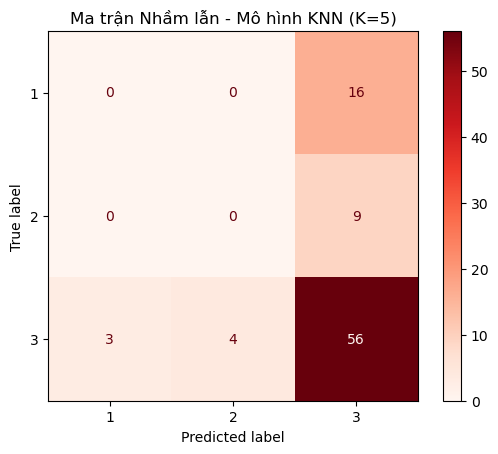


--- (Câu d) Báo cáo Phân loại (Classification Report) ---
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         9
           3       0.69      0.89      0.78        63

    accuracy                           0.64        88
   macro avg       0.23      0.30      0.26        88
weighted avg       0.49      0.64      0.56        88


Accuracy cơ sở (K=5): 0.6364 (tức 63.64%)


In [7]:
print("--- Câu (c) & (d): Đánh giá mô hình trên tập Test ---")

# 1. Dự đoán trên tập kiểm thử
y_pred = model_knn_5.predict(X_test)

# 2. (Câu c) Vẽ Ma trận Nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
# Lấy tên các lớp (1, 2, 3)
class_names = sorted(y.unique().astype(str)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=class_names)
disp.plot(cmap="Reds")
plt.title(f"Ma trận Nhầm lẫn - Mô hình KNN (K=5)")
plt.show()

# 3. (Câu d) Hiển thị Classification Report
print("\n--- (Câu d) Báo cáo Phân loại (Classification Report) ---")
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

# Lấy Accuracy cơ sở để so sánh với câu (e)
acc_baseline = accuracy_score(y_test, y_pred)
print(f"\nAccuracy cơ sở (K=5): {acc_baseline:.4f} (tức {acc_baseline*100:.2f}%)")

In [9]:
print("--- Câu (e): Tối ưu mô hình (Mục tiêu: Accuracy > 70%) ---")
print(f"(Accuracy cơ sở: {acc_baseline*100:.2f}%)")

# 1. Tạo Pipeline (giống hệt cell 3)
# Chúng ta phải dùng GridSearch trên toàn bộ pipeline
pipe_for_grid = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier()) # Để trống K
])

# 2. Định nghĩa không gian tham số (param_grid)
# Chúng ta sẽ tinh chỉnh các tham số của bước 'classifier'
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15], # Các giá trị K
    'classifier__weights': ['uniform', 'distance'],      # Cách tính trọng số
    'classifier__metric': ['euclidean', 'manhattan']     # Cách đo khoảng cách
}

# 3. Khởi tạo GridSearchCV
# scoring='accuracy'
grid_search = GridSearchCV(pipe_for_grid, # Dùng pipeline
                           param_grid, 
                           cv=5, # 5-fold cross-validation
                           scoring='accuracy', 
                           verbose=1)

print("Bắt đầu Grid Search...")
# Chạy Grid Search trên TẬP HUẤN LUYỆN (chưa scale)
grid_search.fit(X_train, y_train)

# 4. In ra kết quả tốt nhất
print("\nGrid Search hoàn tất!")
print(f"Các tham số tốt nhất tìm được: {grid_search.best_params_}")

# 5. Lấy mô hình tốt nhất
best_model = grid_search.best_estimator_

# --- Đánh giá lại mô hình TỐT NHẤT trên tập TEST ---
y_pred_best = best_model.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)

print(f"\n--- Đánh giá mô hình TỐT NHẤT ---")
print(classification_report(y_test, y_pred_best, target_names=class_names))
print(f"   Accuracy TỐT NHẤT: {acc_best:.4f} (tức {acc_best*100:.2f}%)")

# 6. Kiểm tra kết quả
if acc_best >= 0.70:
    print(f"\nCHÚC MỪNG! Đã đạt được giá trị kỳ vọng (Accuracy > 70%)")
else:
    print(f"\nCHƯA ĐẠT MỤC TIÊU. (Accuracy = {acc_best*100:.2f}%)")

--- Câu (e): Tối ưu mô hình (Mục tiêu: Accuracy > 70%) ---
(Accuracy cơ sở: 63.64%)
Bắt đầu Grid Search...
Fitting 5 folds for each of 28 candidates, totalling 140 fits

Grid Search hoàn tất!
Các tham số tốt nhất tìm được: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 15, 'classifier__weights': 'distance'}

--- Đánh giá mô hình TỐT NHẤT ---
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         9
           3       0.72      1.00      0.83        63

    accuracy                           0.72        88
   macro avg       0.24      0.33      0.28        88
weighted avg       0.51      0.72      0.60        88

   Accuracy TỐT NHẤT: 0.7159 (tức 71.59%)

CHÚC MỪNG! Đã đạt được giá trị kỳ vọng (Accuracy > 70%)
